# Machine Learning for Data Analysis
### Week 3: Running a Lasso Regression Analysis

Continuing on the machine learning analysis of internet use rate from the GapMinder dataset, I conducted a lasso regression analysis to identify a subset of variables from a pool of 10 quantitative predictor variables that best predicted a quantitative response variable measuring the internet use rates of the countries in the world. I have added several variables to my standard analysis that are not particularly interesting to my main question of how internet use rates of a country affects income in order to have more variables available for this lasso regression. The explanatory variables I have used in this model are income per person, employment rate, female employment rate, polity score, alcohol consumption, life expectancy, oil per person, electricity use per person, and urban rate. All variables have been normalized to have a mean of zero and standard deviation of one.

Load the data, convert all variables to numeric, and discard NA values

In [1]:
'''
Code for Peer-graded Assignments: Running a Lasso Regression Analysis
Course: Data Management and Visualization
Specialization: Data Analysis and Interpretation
'''
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV

data = pd.read_csv('c:/users/greg/desktop/gapminder.csv', low_memory=False)
 
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')
data['polityscore'] = pd.to_numeric(data['polityscore'], errors='coerce')
data['alcconsumption'] = pd.to_numeric(data['alcconsumption'], errors='coerce')
data['lifeexpectancy'] = pd.to_numeric(data['lifeexpectancy'], errors='coerce')
data['oilperperson'] = pd.to_numeric(data['oilperperson'], errors='coerce')
data['relectricperperson'] = pd.to_numeric(data['relectricperperson'], errors='coerce')
data['urbanrate'] = pd.to_numeric(data['urbanrate'], errors='coerce')

sub1 = data.copy()
data_clean = sub1.dropna()

Select predictor variables and target variable as separate data sets

In [3]:
predvar = data_clean[['incomeperperson','employrate','femaleemployrate','polityscore',
                      'alcconsumption', 'lifeexpectancy', 'oilperperson',
                      'relectricperperson', 'urbanrate']]
target = data_clean.internetuserate

Standardize predictors to have mean = 0 and standard deviation = 1

In [4]:
predictors=predvar.copy()
from sklearn import preprocessing
predictors['incomeperperson']=preprocessing.scale(predictors['incomeperperson'].astype('float64'))
predictors['employrate']=preprocessing.scale(predictors['employrate'].astype('float64'))
predictors['femaleemployrate']=preprocessing.scale(predictors['femaleemployrate'].astype('float64'))
predictors['polityscore']=preprocessing.scale(predictors['polityscore'].astype('float64'))
predictors['alcconsumption']=preprocessing.scale(predictors['alcconsumption'].astype('float64'))
predictors['lifeexpectancy']=preprocessing.scale(predictors['lifeexpectancy'].astype('float64'))
predictors['oilperperson']=preprocessing.scale(predictors['oilperperson'].astype('float64'))
predictors['relectricperperson']=preprocessing.scale(predictors['relectricperperson'].astype('float64'))
predictors['urbanrate']=preprocessing.scale(predictors['urbanrate'].astype('float64'))

Split data into train and test sets

In [6]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.3, random_state=123)

Specify the lasso regression model

In [7]:
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

Print the regression coefficients

In [9]:
dict(zip(predictors.columns, model.coef_))

{'alcconsumption': 6.2210718136158443,
 'employrate': 0.0,
 'femaleemployrate': 0.0,
 'incomeperperson': 10.730391071065633,
 'lifeexpectancy': 7.9415161171462634,
 'oilperperson': 0.0,
 'polityscore': 0.33239766774625268,
 'relectricperperson': 3.3633566029800468,
 'urbanrate': 1.1025066401058063}

Plot coefficient progression 

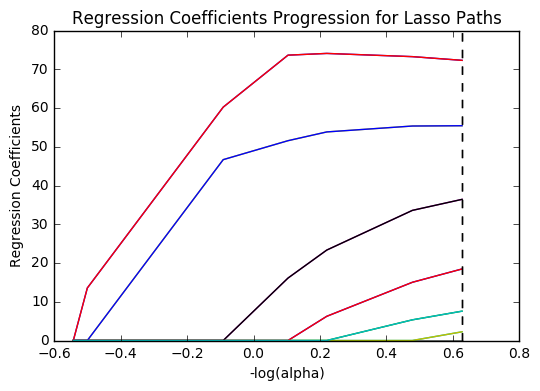

In [12]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.show()

Plot mean square error for each fold

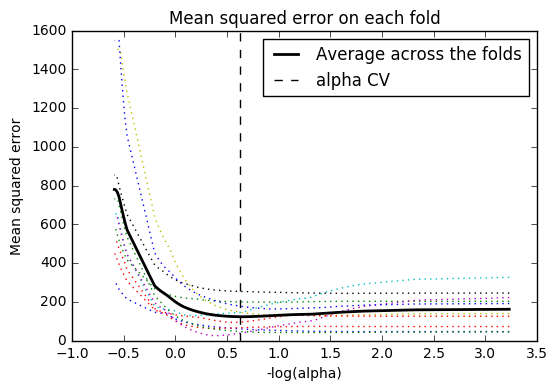

In [13]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.show()

Print the mean squared error from training and test data

In [17]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('')
print ('test data MSE')
print(test_error)

training data MSE
100.103936002

test data MSE
120.568970231


Print the r-squared from training and test data

In [18]:
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('')
print ('test data R-square')
print(rsquared_test)

training data R-square
0.861344142378

test data R-square
0.776942580854


Data were randomly split into a training set that included 70% of the observations (N=42) and a test set that included 30% of the observations (N=18). The least angle regression algorithm with k=10 fold cross validation was used to estimate the lasso regression model in the training set, and the model was validated using the test set. The change in the cross validation average (mean) squared error at each step was used to identify the best subset of predictor variables.

Of the 10 predictor variables, 6 were retained in the model. During the estimation process, income per person and life expectancy were most strongly associated with internet use rate, followed by alcohol consumption and electricity use per person. The last two predictors were urban rate and polity score. All variables were positively correlated with internet use rate. These 6 variables accounted for 77.7% of the variance in the internet use rate response variable.